In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [13]:
df = pd.read_csv('./data/tpsj/test.csv')

In [3]:
df.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          2247 non-null   object 
 1   deg_C              2247 non-null   float64
 2   relative_humidity  2247 non-null   float64
 3   absolute_humidity  2247 non-null   float64
 4   sensor_1           2247 non-null   float64
 5   sensor_2           2247 non-null   float64
 6   sensor_3           2247 non-null   float64
 7   sensor_4           2247 non-null   float64
 8   sensor_5           2247 non-null   float64
dtypes: float64(8), object(1)
memory usage: 158.1+ KB


In [5]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [6]:
df['date_time']

0      2011-01-01 00:00:00
1      2011-01-01 01:00:00
2      2011-01-01 02:00:00
3      2011-01-01 03:00:00
4      2011-01-01 04:00:00
               ...        
2242   2011-04-04 10:00:00
2243   2011-04-04 11:00:00
2244   2011-04-04 12:00:00
2245   2011-04-04 13:00:00
2246   2011-04-04 14:00:00
Name: date_time, Length: 2247, dtype: datetime64[ns]

In [7]:
df['Year'] = df['date_time'].apply(lambda x:x.year) - 2010  #Subtract smallest year for smaller number.
df['Month'] = df['date_time'].apply(lambda x:x.month)
df['Day'] = df['date_time'].apply(lambda x:x.day)
df['Hour'] = df['date_time'].apply(lambda x:x.hour)
df.drop('date_time', axis=1, inplace=True)

In [8]:
df.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,Year,Month,Day,Hour
count,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.0,2247.000000,2247.000000,2247.00000
mean,10.808144,51.031242,0.627053,1106.534490,836.459769,828.321495,1104.850601,1029.851535,1.0,2.077437,15.022697,11.46996
std,6.444497,16.665047,0.266588,205.341455,272.816585,339.511779,293.112225,434.863287,0.0,0.900808,8.916698,6.91932
min,-1.800000,9.800000,0.184700,665.900000,356.200000,320.100000,523.400000,218.800000,1.0,1.000000,1.000000,0.00000
25%,5.600000,36.900000,0.413350,951.500000,640.700000,597.050000,899.450000,688.550000,1.0,1.000000,7.000000,5.00000
50%,9.800000,50.600000,0.596400,1080.400000,800.800000,757.100000,1076.200000,973.100000,1.0,2.000000,15.000000,11.00000
75%,14.200000,63.550000,0.804950,1222.100000,1016.100000,944.950000,1288.350000,1324.000000,1.0,3.000000,23.000000,17.00000
max,30.900000,88.800000,1.393000,1882.900000,1776.100000,1975.000000,2211.400000,2593.800000,1.0,4.000000,31.000000,23.00000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   deg_C              2247 non-null   float64
 1   relative_humidity  2247 non-null   float64
 2   absolute_humidity  2247 non-null   float64
 3   sensor_1           2247 non-null   float64
 4   sensor_2           2247 non-null   float64
 5   sensor_3           2247 non-null   float64
 6   sensor_4           2247 non-null   float64
 7   sensor_5           2247 non-null   float64
 8   Year               2247 non-null   int64  
 9   Month              2247 non-null   int64  
 10  Day                2247 non-null   int64  
 11  Hour               2247 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 210.8 KB


<AxesSubplot:>

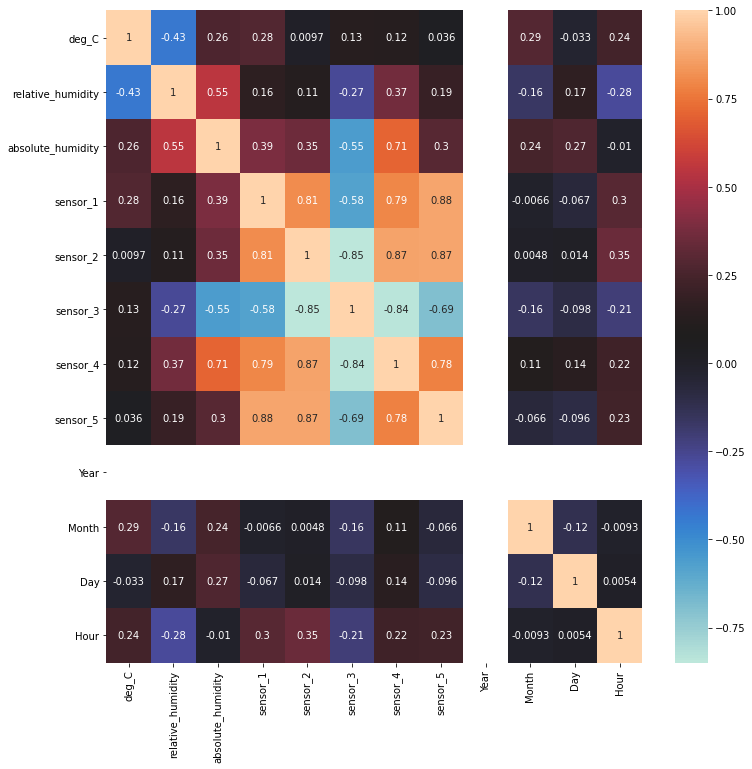

In [10]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='icefire')

In [16]:
df = pd.read_csv('./data/tpsj/train.csv')

In [17]:
def add_new_heatmap_features(df):
    """
    Adds new features to a given dataset for correlation heatmap
    """
  
    dt = pd.to_datetime(df["date_time"]).dt
    df["hour"] = dt.hour
    df["working_hours"] =  df["hour"].isin(np.arange(8, 21, 1)).astype("int")
    df["maximum_hours"] =  df["hour"].isin([8, 9, 17, 18, 19, 20]).astype("int")
    df["is_weekend"] = (dt.dayofweek >= 5).astype("int") # Fixed bug with `train` instead of df
    df["SMC"] = (df["absolute_humidity"] * 100) / df["relative_humidity"]
    df["temp-6"] = df["deg_C"] - df["deg_C"].shift(periods=6, fill_value=0)
    df["temp-3"] = df["deg_C"] - df["deg_C"].shift(periods=3, fill_value=0)
    df["temp-24"] = df["deg_C"] - df["deg_C"].shift(periods=24, fill_value=0)
    df["abshum-6"] = df["absolute_humidity"] - df["absolute_humidity"].shift(periods=6, fill_value=0)
    df["abshum-3"] = df["absolute_humidity"] - df["absolute_humidity"].shift(periods=3, fill_value=0)
    df["relhum-6"] = df["relative_humidity"] - df["relative_humidity"].shift(periods=6, fill_value=0)
    df["relhum-3"] = df["relative_humidity"] - df["relative_humidity"].shift(periods=3, fill_value=0)
    df["s1-6"] = df["sensor_1"] - df["sensor_1"].shift(periods=6, fill_value=0)
    df["s2-6"] = df["sensor_2"] - df["sensor_2"].shift(periods=6, fill_value=0)
    df["s3-6"] = df["sensor_3"] - df["sensor_3"].shift(periods=6, fill_value=0)
    df["s4-6"] = df["sensor_4"] - df["sensor_4"].shift(periods=6, fill_value=0)
    df["s5-6"] = df["sensor_5"] - df["sensor_5"].shift(periods=6, fill_value=0)
    
    df.drop(["hour"], axis=1, inplace=True)
    
add_new_heatmap_features(df)

In [18]:
df.to_csv('./data/processed/carbontrain-v1.csv', index=False)